# Stationary Stochastic Processes

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf

In [2]:
def import_dta(link):
    name = pd.read_stata(link)
    return name

### 2.2
Create a scatter plot to identify if there is serial dependency for lag k = 1,2,3 in the GNP series. Add the means and the regression line.

In [3]:
gnp = import_dta("C:\\Users\\gonza\\Documents\\GitHub\\TSA\\data\\GNP.dta")

In [4]:
gnp.head()

,GNP
0,0.00632
1,0.00366
2,0.01202
3,0.00627
4,0.01761


In [5]:
len(gnp['GNP'])

176

In [6]:
gnp['time'] = pd.Series(pd.period_range('1/1/1947', freq='Q', periods=176))

In [7]:
def lag(df, var, n_lags = 1):
    for i in np.arange(1,n_lags+1):
        lag_name = "lag" + str(i)
        df[lag_name] = df[var].shift(-i)

In [8]:
lag(gnp, "GNP", 3)

In [9]:
gnp.head()

,GNP,time,lag1,lag2,lag3
0,0.00632,1947Q1,0.00366,0.01202,0.00627
1,0.00366,1947Q2,0.01202,0.00627,0.01761
2,0.01202,1947Q3,0.00627,0.01761,0.00918
3,0.00627,1947Q4,0.01761,0.00918,0.00820
4,0.01761,1948Q1,0.00918,0.00820,-0.01170


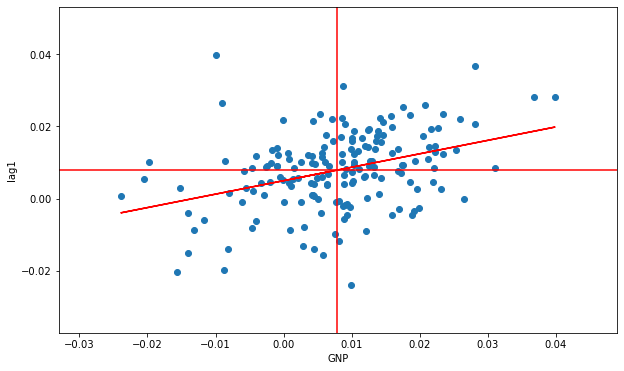

In [10]:
gnp = gnp.dropna()
reg1 = LinearRegression().fit(gnp["GNP"].values.reshape(-1, 1), gnp["lag1"].values.reshape(-1, 1))
lin1 = reg1.predict(gnp["GNP"].values.reshape(-1, 1))
meangnp = gnp["GNP"].mean()
meanlag1 = gnp["lag1"].mean()
fig, ax = plt.subplots(figsize= (10, 6))
ax.scatter(gnp["GNP"], gnp["lag1"])
ax.set(xlabel = "GNP", ylabel = "lag1")
ax.plot(gnp["GNP"], lin1, c ='r')
ax.axvline(x = meangnp, c = 'r')
ax.axhline(y = meanlag1, c = 'r')

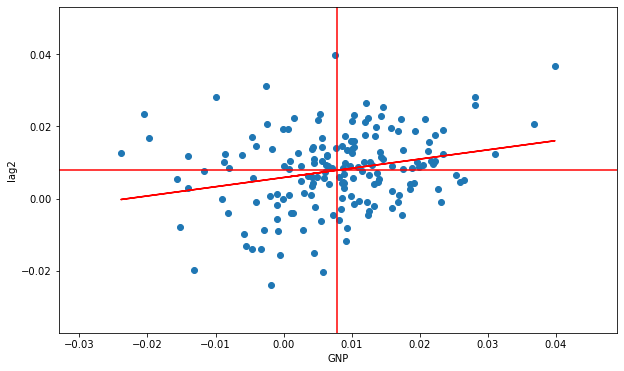

In [11]:
reg2 = LinearRegression().fit(gnp["GNP"].values.reshape(-1, 1), gnp["lag2"].values.reshape(-1, 1))
lin2 = reg2.predict(gnp["GNP"].values.reshape(-1, 1))
meangnp = gnp["GNP"].mean()
meanlag2 = gnp["lag2"].mean()
fig, ax = plt.subplots(figsize= (10, 6))
ax.scatter(gnp["GNP"], gnp["lag2"])
ax.set(xlabel = "GNP", ylabel = "lag2")
ax.plot(gnp["GNP"], lin2, c ='r')
ax.axvline(x = meangnp, c = 'r')
ax.axhline(y = meanlag2, c = 'r')

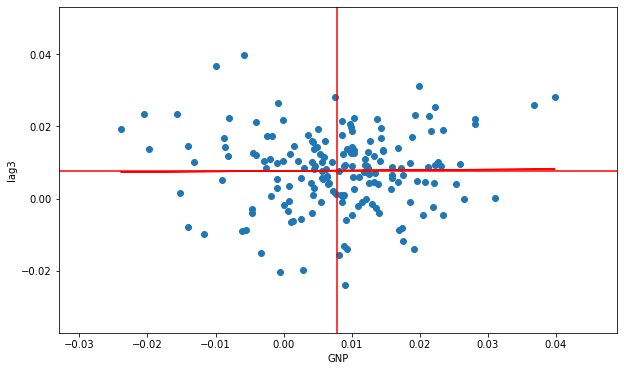

In [12]:
reg3 = LinearRegression().fit(gnp["GNP"].values.reshape(-1, 1), gnp["lag3"].values.reshape(-1, 1))
lin3 = reg3.predict(gnp["GNP"].values.reshape(-1, 1))
meangnp = gnp["GNP"].mean()
meanlag3 = gnp["lag3"].mean()
fig, ax = plt.subplots(figsize= (10, 6))
ax.scatter(gnp["GNP"], gnp["lag3"])
ax.set(xlabel = "GNP", ylabel = "lag3")
ax.plot(gnp["GNP"], lin3, c ='r')
ax.axvline(x = meangnp, c = 'r')
ax.axhline(y = meanlag3, c = 'r')

### Calculate the values of the autocorrelation function for the series.

In [13]:
pd.Series(sm.tsa.acf(gnp["GNP"], nlags=5))

C:\Users\gonza\Miniconda3\envs\lepanto\lib\site-packages\statsmodels\tsa\stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


0    1.000000
1    0.371132
2    0.250473
3    0.003976
4   -0.095349
5   -0.117263
dtype: float64

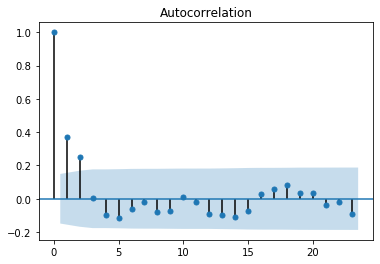

In [18]:
plot_acf(gnp["GNP"])
plt.show()